In [4]:
import pandas as pd
import os
import numpy as np

In [10]:
# Check if required columns exist
print("Columns in dataset:", df.columns.tolist())
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Columns in dataset: ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']

Dataset shape: (20000, 27)

First few rows:


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.24964,49,0,Self_Employed,Tier_1,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.59659,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.60508,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422
3,101455.60020,21,0,Self_Employed,Tier_3,15218.340040,6809.441427,4889.418087,14690.149360,7106.130005,...,16694.965140,31617.953610,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.28355,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [5]:
df = pd.read_csv('data/kaggle.csv')

In [6]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249640,49,0,Self_Employed,Tier_1,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596590,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605080,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422
3,101455.600200,21,0,Self_Employed,Tier_3,15218.340040,6809.441427,4889.418087,14690.149360,7106.130005,...,16694.965140,31617.953610,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283550,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466180,51,4,Self_Employed,Tier_1,12274.039850,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833326,44.900294,98.765527,190.591917
19996,90295.772640,21,1,Student,Tier_2,18059.154530,0.000000,2770.589626,13118.222420,4633.108332,...,10613.589600,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567370,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817200,27,2,Professional,Tier_1,35447.345170,12345.910540,4735.672471,16392.438430,8248.242279,...,10603.684810,10603.684810,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


In [7]:
print(df.columns)

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')


In [9]:

unique_occupation = df['Occupation'].unique()
print(unique_occupation)

['Self_Employed' 'Retired' 'Student' 'Professional']


In [16]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Annual_Income
0,44637.24964,49,0,Self_Employed,Tier_1,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,...,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,4.596757e+05
1,26858.59659,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,2.663578e+05
2,50367.60508,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422,5.232496e+05
3,101455.60020,21,0,Self_Employed,Tier_3,15218.340040,6809.441427,4889.418087,14690.149360,7106.130005,...,31617.953610,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,1.107268e+06
4,24875.28355,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,2.452581e+05


In [19]:
df.to_csv('data/processed_data.csv', index=False)

In [20]:
# Load the processed data
df = pd.read_csv('data/processed_data.csv')

# Define multipliers for each category based on Occupation and City_Tier
multipliers = {
    'Rent': {
        'Professional': {'Tier_1': 12.5, 'Tier_2': 11.5, 'Tier_3': 9.5},
        'Self_Employed': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 8.5},
        'Student': {'Tier_1': 11, 'Tier_2': 10, 'Tier_3': 8}
    },
    'Groceries': {
        'Professional': {'Tier_1': 12, 'Tier_2': 11.5, 'Tier_3': 10.5},
        'Self_Employed': {'Tier_1': 11.5, 'Tier_2': 11, 'Tier_3': 10},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9.5},
        'Student': {'Tier_1': 10, 'Tier_2': 9.5, 'Tier_3': 9}
    },
    'Transport': {
        'Professional': {'Tier_1': 12.5, 'Tier_2': 11.5, 'Tier_3': 10},
        'Self_Employed': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9.5},
        'Retired': {'Tier_1': 11, 'Tier_2': 10, 'Tier_3': 9},
        'Student': {'Tier_1': 10.5, 'Tier_2': 9.5, 'Tier_3': 9}
    },
    'Eating_Out': {
        'Professional': {'Tier_1': 12.5, 'Tier_2': 11.5, 'Tier_3': 9.5},
        'Self_Employed': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9},
        'Student': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9}
    },
    'Entertainment': {
        'Professional': {'Tier_1': 12.5, 'Tier_2': 11.5, 'Tier_3': 9.5},
        'Self_Employed': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9},
        'Student': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9.5}
    },
    'Utilities': {
        'Professional': {'Tier_1': 12, 'Tier_2': 11.5, 'Tier_3': 10.5},
        'Self_Employed': {'Tier_1': 11.5, 'Tier_2': 11, 'Tier_3': 10},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 10},
        'Student': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9.5}
    },
    'Healthcare': {
        'Professional': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 10},
        'Self_Employed': {'Tier_1': 11.5, 'Tier_2': 10.5, 'Tier_3': 10},
        'Retired': {'Tier_1': 12, 'Tier_2': 11.5, 'Tier_3': 10.5},
        'Student': {'Tier_1': 10, 'Tier_2': 9.5, 'Tier_3': 9}
    },
    'Education': {
        'Professional': {'Tier_1': 11.5, 'Tier_2': 11, 'Tier_3': 10.5},
        'Self_Employed': {'Tier_1': 11.5, 'Tier_2': 11, 'Tier_3': 10},
        'Retired': {'Tier_1': 9, 'Tier_2': 9, 'Tier_3': 9},
        'Student': {'Tier_1': 0, 'Tier_2': 0, 'Tier_3': 0}  # Not applicable
    },
    'Miscellaneous': {
        'Professional': {'Tier_1': 12.5, 'Tier_2': 11.5, 'Tier_3': 10},
        'Self_Employed': {'Tier_1': 12, 'Tier_2': 11, 'Tier_3': 9.5},
        'Retired': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9},
        'Student': {'Tier_1': 11, 'Tier_2': 10.5, 'Tier_3': 9}
    }
}

# Categories to convert to annual (excluding Income which is already annual)
expense_categories = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 
                      'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 
                      'Education', 'Miscellaneous']

# Function to get the appropriate multiplier
def get_multiplier(category, occupation, city_tier):
    """
    Get the annual multiplier for a given category, occupation, and city tier.
    For Loan_Repayment and Insurance, use a standard 12× multiplier.
    """
    if category in ['Loan_Repayment', 'Insurance']:
        return 12  # Standard annual conversion
    
    if category in multipliers and occupation in multipliers[category]:
        return multipliers[category][occupation].get(city_tier, 12)
    
    return 12  # Default multiplier

# Create annual expense columns
print("Converting monthly expenses to annual expenditures...")

for category in expense_categories:
    annual_col_name = f'Annual_{category}'
    
    # Apply the multiplier based on occupation and city tier
    df[annual_col_name] = df.apply(
        lambda row: row[category] * get_multiplier(category, row['Occupation'], row['City_Tier']),
        axis=1
    )
    
    print(f"✓ Converted {category} to {annual_col_name}")

# Calculate total annual expenses
annual_expense_cols = [f'Annual_{cat}' for cat in expense_categories]
df['Total_Annual_Expenses'] = df[annual_expense_cols].sum(axis=1)

# Calculate annual savings
df['Annual_Savings'] = df['Annual_Income'] - df['Total_Annual_Expenses']

# Calculate actual savings rate
df['Actual_Savings_Rate'] = (df['Annual_Savings'] / df['Annual_Income'] * 100).round(2)

# Save the updated dataframe
output_file = 'data/processed_data_with_annual.csv'
df.to_csv(output_file, index=False)

print(f"\n✓ Successfully created annual expenditure columns")
print(f"✓ Saved to: {output_file}")

# Display summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\nAnnual Income Statistics:")
print(f"  Mean: ₹{df['Annual_Income'].mean():,.2f}")
print(f"  Median: ₹{df['Annual_Income'].median():,.2f}")
print(f"  Min: ₹{df['Annual_Income'].min():,.2f}")
print(f"  Max: ₹{df['Annual_Income'].max():,.2f}")

print("\nTotal Annual Expenses Statistics:")
print(f"  Mean: ₹{df['Total_Annual_Expenses'].mean():,.2f}")
print(f"  Median: ₹{df['Total_Annual_Expenses'].median():,.2f}")
print(f"  Min: ₹{df['Total_Annual_Expenses'].min():,.2f}")
print(f"  Max: ₹{df['Total_Annual_Expenses'].max():,.2f}")

print("\nAnnual Savings Statistics:")
print(f"  Mean: ₹{df['Annual_Savings'].mean():,.2f}")
print(f"  Median: ₹{df['Annual_Savings'].median():,.2f}")
print(f"  Min: ₹{df['Annual_Savings'].min():,.2f}")
print(f"  Max: ₹{df['Annual_Savings'].max():,.2f}")

print("\nActual Savings Rate Statistics:")
print(f"  Mean: {df['Actual_Savings_Rate'].mean():.2f}%")
print(f"  Median: {df['Actual_Savings_Rate'].median():.2f}%")
print(f"  Min: {df['Actual_Savings_Rate'].min():.2f}%")
print(f"  Max: {df['Actual_Savings_Rate'].max():.2f}%")

# Display breakdown by occupation and city tier
print("\n" + "="*60)
print("AVERAGE ANNUAL EXPENSES BY OCCUPATION AND CITY TIER")
print("="*60)

for occupation in df['Occupation'].unique():
    print(f"\n{occupation}:")
    for tier in ['Tier_1', 'Tier_2', 'Tier_3']:
        subset = df[(df['Occupation'] == occupation) & (df['City_Tier'] == tier)]
        if len(subset) > 0:
            avg_expense = subset['Total_Annual_Expenses'].mean()
            avg_income = subset['Annual_Income'].mean()
            avg_savings_rate = subset['Actual_Savings_Rate'].mean()
            print(f"  {tier}: Avg Income: ₹{avg_income:,.2f} | "
                  f"Avg Expenses: ₹{avg_expense:,.2f} | "
                  f"Avg Savings Rate: {avg_savings_rate:.2f}%")

# Display sample of the new columns
print("\n" + "="*60)
print("SAMPLE DATA (First 5 rows)")
print("="*60)
display_cols = ['Income', 'Occupation', 'City_Tier', 'Annual_Income', 
                'Total_Annual_Expenses', 'Annual_Savings', 'Actual_Savings_Rate']
print(df[display_cols].head().to_string(index=False))

print("\n" + "="*60)
print(f"Total rows processed: {len(df):,}")
print("="*60)

Converting monthly expenses to annual expenditures...
✓ Converted Rent to Annual_Rent
✓ Converted Loan_Repayment to Annual_Loan_Repayment
✓ Converted Insurance to Annual_Insurance
✓ Converted Groceries to Annual_Groceries
✓ Converted Transport to Annual_Transport
✓ Converted Eating_Out to Annual_Eating_Out
✓ Converted Entertainment to Annual_Entertainment
✓ Converted Utilities to Annual_Utilities
✓ Converted Healthcare to Annual_Healthcare
✓ Converted Education to Annual_Education
✓ Converted Miscellaneous to Annual_Miscellaneous

✓ Successfully created annual expenditure columns
✓ Saved to: data/processed_data_with_annual.csv

SUMMARY STATISTICS

Annual Income Statistics:
  Mean: ₹436,127.79
  Median: ₹301,993.30
  Min: ₹9,949.61
  Max: ₹13,699,000.35

Total Annual Expenses Statistics:
  Mean: ₹329,281.43
  Median: ₹234,838.90
  Min: ₹9,566.86
  Max: ₹8,041,217.94

Annual Savings Statistics:
  Mean: ₹106,846.36
  Median: ₹56,706.95
  Min: ₹-200,596.08
  Max: ₹5,657,782.41

Actual Savi

STEP 3: MISSED PAYMENT SIMULATION

Calculating missed payments for each individual...
This may take a moment...

✓ Successfully calculated missed payments
✓ Saved to: data/processed_data_with_missed_payments.csv

MISSED PAYMENT STATISTICS

Total Missed Payments:
  Mean: ₹6,845.03
  Median: ₹4,526.36
  Min: ₹129.54
  Max: ₹151,075.47

Missed Payment Rate (% of Total Expenses):
  Mean: 2.16%
  Median: 2.00%
  Min: 0.34%
  Max: 6.65%

Payment Reliability Score:
  Mean: 97.84
  Median: 98.00
  Min: 93.35
  Max: 99.66

Base Miss Rate by Occupation & Tier:
  Mean: 4.64%
  Median: 4.39%

AVERAGE MISSED PAYMENTS BY OCCUPATION AND CITY TIER

Self_Employed:
  Tier_1: Avg Missed: ₹6,811.43 | Miss Rate: 1.71% | Base Rate: 3.50% | Reliability: 98.29
  Tier_2: Avg Missed: ₹7,908.67 | Miss Rate: 2.27% | Base Rate: 4.99% | Reliability: 97.73
  Tier_3: Avg Missed: ₹9,397.93 | Miss Rate: 3.26% | Base Rate: 7.54% | Reliability: 96.74

Retired:
  Tier_1: Avg Missed: ₹4,479.30 | Miss Rate: 1.23% | Base Rat

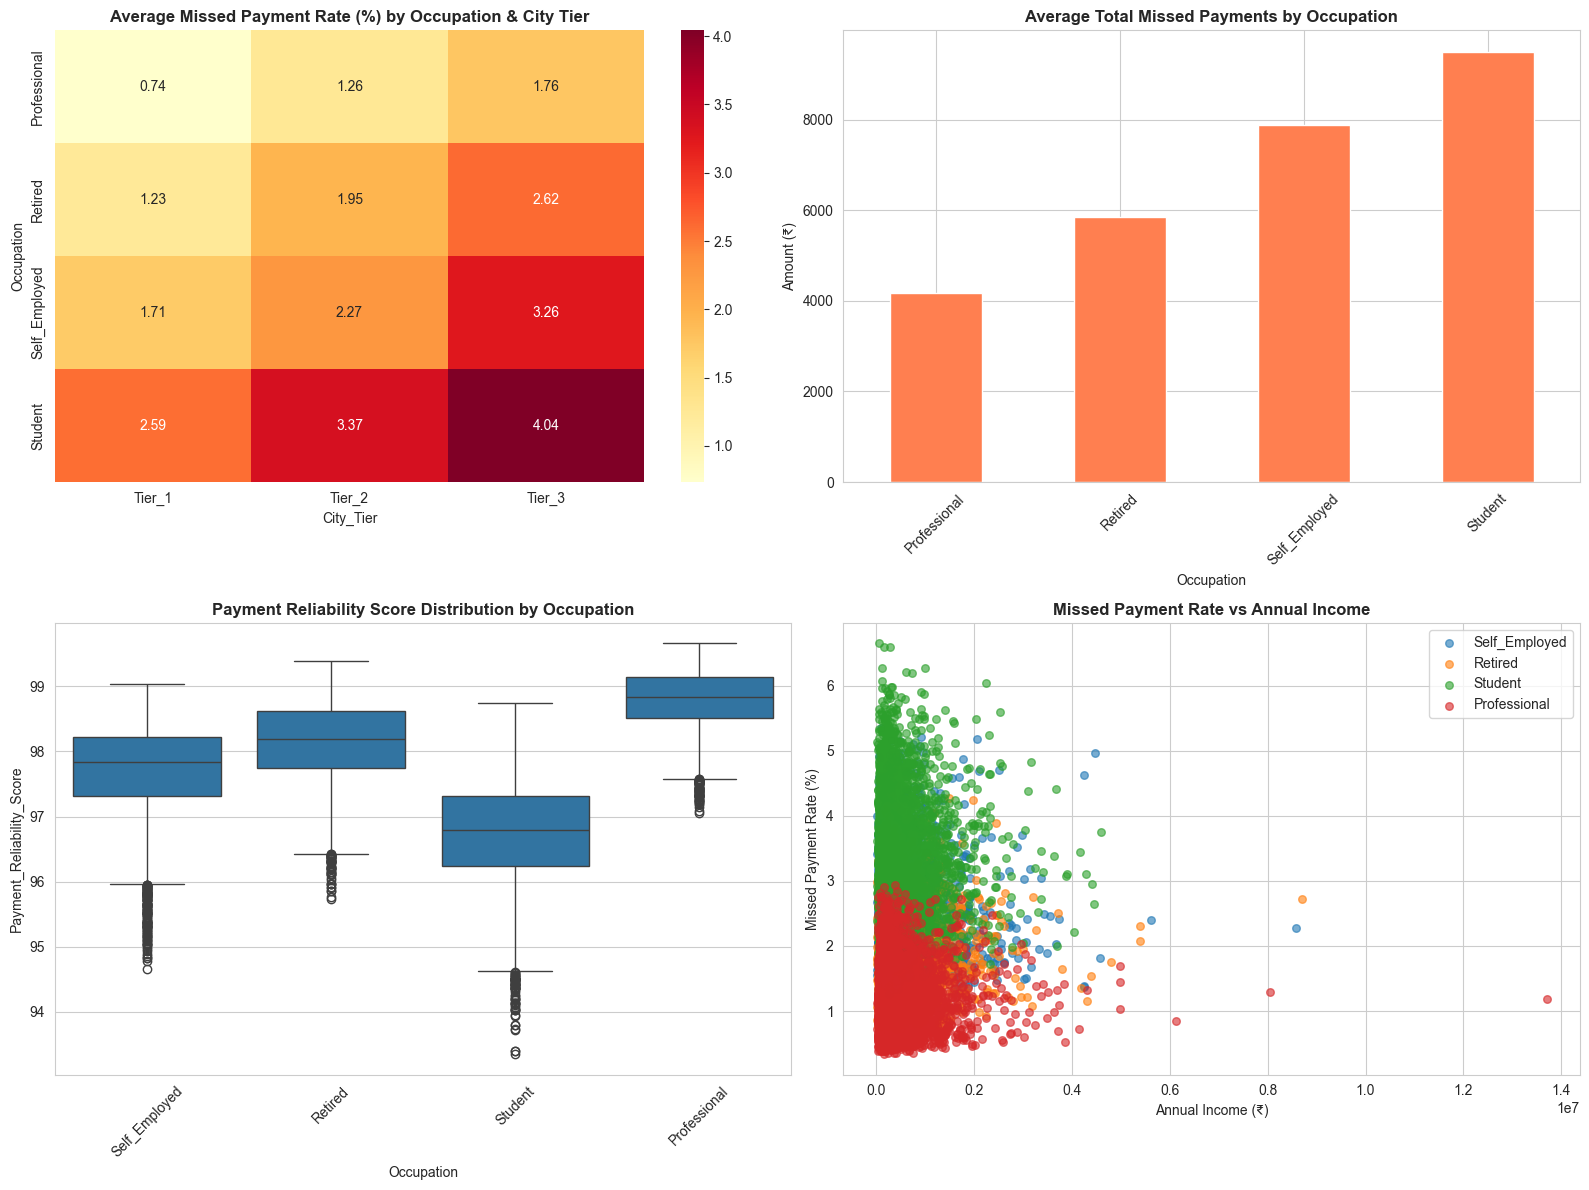


MISSED PAYMENT SIMULATION COMPLETE


In [21]:
import pandas as pd
import numpy as np

# Load the data with annual expenses
df = pd.read_csv('data/processed_data_with_annual.csv')

print("="*60)
print("STEP 3: MISSED PAYMENT SIMULATION")
print("="*60)

# Set random seed for reproducibility (optional - remove for different results each time)
np.random.seed(42)

# 3A. Define missed payment rate ranges (% of months in year where payment delayed/failed)
missed_payment_rates = {
    'Professional': {'Tier_1': (1, 2), 'Tier_2': (2, 3.5), 'Tier_3': (3, 5)},
    'Self_Employed': {'Tier_1': (3, 4), 'Tier_2': (4, 6), 'Tier_3': (6, 9)},
    'Retired': {'Tier_1': (2, 3), 'Tier_2': (3.5, 5), 'Tier_3': (5, 7)},
    'Student': {'Tier_1': (4, 6), 'Tier_2': (6, 8), 'Tier_3': (8, 10)}
}

# 3B. Define missed payment severity (proportion of monthly amount delayed)
severity_ranges = {
    'Rent': {'range': (50, 100), 'noise': 10},
    'Utilities': {'range': (30, 70), 'noise': 5},
    'Insurance': {'range': (40, 80), 'noise': 10},
    'Loan_Repayment': {'range': (100, 100), 'noise': 0},  # Non-negotiable
    'Groceries': {'range': (10, 30), 'noise': 5},
    'Transport': {'range': (10, 30), 'noise': 5},
    'Eating_Out': {'range': (10, 30), 'noise': 5},
    'Entertainment': {'range': (10, 30), 'noise': 5},
    'Miscellaneous': {'range': (10, 30), 'noise': 5},
    'Healthcare': {'range': (10, 40), 'noise': 5},
    'Education': {'range': (10, 40), 'noise': 5}
}

# 3C. Define occupation-specific noise levels
occupation_noise = {
    'Professional': 2,
    'Self_Employed': 5,
    'Retired': 4,
    'Student': 6
}

def calculate_missed_payments(row):
    """
    Calculate missed payments for an individual based on occupation, city tier, and expenses.
    """
    occupation = row['Occupation']
    city_tier = row['City_Tier']
    
    # Get base miss rate (convert to decimal)
    miss_rate_range = missed_payment_rates[occupation][city_tier]
    base_miss_rate = np.random.uniform(miss_rate_range[0], miss_rate_range[1]) / 100
    
    # Apply occupation-specific noise
    occ_noise = occupation_noise[occupation] / 100
    miss_rate = base_miss_rate * np.random.normal(1, occ_noise)
    
    # Ensure miss rate is within reasonable bounds (0-20%)
    miss_rate = np.clip(miss_rate, 0, 0.20)
    
    # Calculate missed payments for each category
    total_missed = 0
    missed_by_category = {}
    
    for category in severity_ranges.keys():
        annual_col = f'Annual_{category}'
        
        # Skip if column doesn't exist or value is 0
        if annual_col not in row.index or row[annual_col] == 0:
            missed_by_category[f'Missed_{category}'] = 0
            continue
        
        # Get monthly amount (annual / 12)
        monthly_amount = row[annual_col] / 12
        
        # Get severity range for this category
        severity = severity_ranges[category]
        severity_pct = np.random.uniform(severity['range'][0], severity['range'][1]) / 100
        
        # Add noise to severity
        if severity['noise'] > 0:
            noise_factor = np.random.normal(1, severity['noise'] / 100)
            severity_pct *= noise_factor
            severity_pct = np.clip(severity_pct, 0, 1)
        
        # Calculate missed amount for this category
        # missed_amt = monthly_amount * miss_rate * 12 * severity_pct
        missed_amt = monthly_amount * miss_rate * 12 * severity_pct
        
        missed_by_category[f'Missed_{category}'] = missed_amt
        total_missed += missed_amt
    
    # Apply upper bound control: total missed ≤ 15% of annual income
    max_allowed_missed = 0.15 * row['Annual_Income']
    
    if total_missed > max_allowed_missed:
        # Scale down all missed payments proportionally
        scale_factor = max_allowed_missed / total_missed
        for key in missed_by_category:
            missed_by_category[key] *= scale_factor
        total_missed = max_allowed_missed
    
    # Store the base miss rate for analysis
    missed_by_category['Base_Miss_Rate_Pct'] = miss_rate * 100
    missed_by_category['Total_Missed_Payments'] = total_missed
    
    return pd.Series(missed_by_category)

print("\nCalculating missed payments for each individual...")
print("This may take a moment...\n")

# Apply the function to calculate missed payments
missed_payments_df = df.apply(calculate_missed_payments, axis=1)

# Concatenate with original dataframe
df = pd.concat([df, missed_payments_df], axis=1)

# Calculate derived metrics
df['Missed_Payment_Rate'] = (df['Total_Missed_Payments'] / df['Total_Annual_Expenses'] * 100).round(2)
df['Payment_Reliability_Score'] = (100 - df['Missed_Payment_Rate']).round(2)

# Adjust Annual Savings to account for missed payments
df['Adjusted_Annual_Savings'] = df['Annual_Savings'] - df['Total_Missed_Payments']
df['Adjusted_Savings_Rate'] = (df['Adjusted_Annual_Savings'] / df['Annual_Income'] * 100).round(2)

# Save the updated dataframe
output_file = 'data/processed_data_with_missed_payments.csv'
df.to_csv(output_file, index=False)

print(f"✓ Successfully calculated missed payments")
print(f"✓ Saved to: {output_file}")

# Display summary statistics
print("\n" + "="*60)
print("MISSED PAYMENT STATISTICS")
print("="*60)

print("\nTotal Missed Payments:")
print(f"  Mean: ₹{df['Total_Missed_Payments'].mean():,.2f}")
print(f"  Median: ₹{df['Total_Missed_Payments'].median():,.2f}")
print(f"  Min: ₹{df['Total_Missed_Payments'].min():,.2f}")
print(f"  Max: ₹{df['Total_Missed_Payments'].max():,.2f}")

print("\nMissed Payment Rate (% of Total Expenses):")
print(f"  Mean: {df['Missed_Payment_Rate'].mean():.2f}%")
print(f"  Median: {df['Missed_Payment_Rate'].median():.2f}%")
print(f"  Min: {df['Missed_Payment_Rate'].min():.2f}%")
print(f"  Max: {df['Missed_Payment_Rate'].max():.2f}%")

print("\nPayment Reliability Score:")
print(f"  Mean: {df['Payment_Reliability_Score'].mean():.2f}")
print(f"  Median: {df['Payment_Reliability_Score'].median():.2f}")
print(f"  Min: {df['Payment_Reliability_Score'].min():.2f}")
print(f"  Max: {df['Payment_Reliability_Score'].max():.2f}")

print("\nBase Miss Rate by Occupation & Tier:")
print(f"  Mean: {df['Base_Miss_Rate_Pct'].mean():.2f}%")
print(f"  Median: {df['Base_Miss_Rate_Pct'].median():.2f}%")

# Display breakdown by occupation and city tier
print("\n" + "="*60)
print("AVERAGE MISSED PAYMENTS BY OCCUPATION AND CITY TIER")
print("="*60)

for occupation in df['Occupation'].unique():
    print(f"\n{occupation}:")
    for tier in ['Tier_1', 'Tier_2', 'Tier_3']:
        subset = df[(df['Occupation'] == occupation) & (df['City_Tier'] == tier)]
        if len(subset) > 0:
            avg_missed = subset['Total_Missed_Payments'].mean()
            avg_miss_rate = subset['Missed_Payment_Rate'].mean()
            avg_base_rate = subset['Base_Miss_Rate_Pct'].mean()
            avg_reliability = subset['Payment_Reliability_Score'].mean()
            print(f"  {tier}: Avg Missed: ₹{avg_missed:,.2f} | "
                  f"Miss Rate: {avg_miss_rate:.2f}% | "
                  f"Base Rate: {avg_base_rate:.2f}% | "
                  f"Reliability: {avg_reliability:.2f}")

# Display category-wise missed payment analysis
print("\n" + "="*60)
print("CATEGORY-WISE MISSED PAYMENT ANALYSIS")
print("="*60)

missed_cols = [col for col in df.columns if col.startswith('Missed_') and col != 'Missed_Payment_Rate']
for col in missed_cols:
    if col not in ['Missed_Payment_Rate']:
        category = col.replace('Missed_', '')
        avg_missed = df[col].mean()
        total_missed = df[col].sum()
        print(f"{category:20s}: Avg ₹{avg_missed:>10,.2f} | Total ₹{total_missed:>15,.2f}")

# Display sample data
print("\n" + "="*60)
print("SAMPLE DATA (First 5 rows)")
print("="*60)
display_cols = ['Occupation', 'City_Tier', 'Annual_Income', 'Total_Annual_Expenses', 
                'Total_Missed_Payments', 'Missed_Payment_Rate', 'Payment_Reliability_Score',
                'Adjusted_Annual_Savings', 'Adjusted_Savings_Rate']
print(df[display_cols].head().to_string(index=False))

print("\n" + "="*60)
print(f"Total rows processed: {len(df):,}")
print("="*60)

# Create visualization of missed payments
print("\nGenerating visualizations...")

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Missed Payment Rate by Occupation and City Tier
pivot_miss_rate = df.pivot_table(values='Missed_Payment_Rate', 
                                   index='Occupation', 
                                   columns='City_Tier', 
                                   aggfunc='mean')
sns.heatmap(pivot_miss_rate, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[0, 0])
axes[0, 0].set_title('Average Missed Payment Rate (%) by Occupation & City Tier', fontsize=12, fontweight='bold')

# 2. Total Missed Payments by Occupation
df.groupby('Occupation')['Total_Missed_Payments'].mean().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Average Total Missed Payments by Occupation', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Amount (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Payment Reliability Score Distribution
sns.boxplot(data=df, x='Occupation', y='Payment_Reliability_Score', ax=axes[1, 0])
axes[1, 0].set_title('Payment Reliability Score Distribution by Occupation', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Missed Payment Rate vs Annual Income (scatter)
for occupation in df['Occupation'].unique():
    subset = df[df['Occupation'] == occupation]
    axes[1, 1].scatter(subset['Annual_Income'], subset['Missed_Payment_Rate'], 
                      label=occupation, alpha=0.6, s=30)
axes[1, 1].set_title('Missed Payment Rate vs Annual Income', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Annual Income (₹)')
axes[1, 1].set_ylabel('Missed Payment Rate (%)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('data/missed_payments_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved to: data/missed_payments_analysis.png")

plt.show()

print("\n" + "="*60)
print("MISSED PAYMENT SIMULATION COMPLETE")
print("="*60)

In [23]:
df = pd.read_csv('data\processed_data_with_missed_payments.csv')

# Define the banks by tier
tier_1_banks = [
    "HDFC Bank Ltd.",
    "Bank of Baroda",
    "Union Bank of India",
    "State Bank of India",
    "Punjab National Bank",
    "Kotak Mahindra Bank",
    "Canara Bank",
    "Axis Bank Ltd."
]

tier_2_banks = [
    "ICICI Bank Ltd.",
    "Indian Bank",
    "Bank of India",
    "Indian Overseas Bank",
    "Central Bank of India",
    "UCO Bank"
]

tier_3_banks = [
    "Federal Bank Ltd.",
    "Bank of Maharashtra",
    "IndusInd Bank Ltd.",
    "IDBI Bank Ltd.",
    "Yes Bank Ltd.",
    "Karnataka Bank",
    "IDFC FIRST Bank"
]

# Define probability distributions
probability_matrix = {
    'Tier_1': {'Tier_1': 0.55, 'Tier_2': 0.30, 'Tier_3': 0.15},
    'Tier_2': {'Tier_1': 0.35, 'Tier_2': 0.40, 'Tier_3': 0.25},
    'Tier_3': {'Tier_1': 0.25, 'Tier_2': 0.35, 'Tier_3': 0.40}
}

# Function to assign bank based on city tier
def assign_bank(city_tier):
    # Get probabilities for this city tier
    probs = probability_matrix[city_tier]
    
    # Choose bank tier based on probabilities
    bank_tier = np.random.choice(
        ['Tier_1', 'Tier_2', 'Tier_3'],
        p=[probs['Tier_1'], probs['Tier_2'], probs['Tier_3']]
    )
    
    # Select random bank from chosen tier
    if bank_tier == 'Tier_1':
        return np.random.choice(tier_1_banks)
    elif bank_tier == 'Tier_2':
        return np.random.choice(tier_2_banks)
    else:
        return np.random.choice(tier_3_banks)

# Set random seed for reproducibility (optional)
np.random.seed(42)

# Assign banks to each record
df['UPI_Remitter_Bank'] = df['City_Tier'].apply(assign_bank)

# Save the updated dataframe
df.to_csv('processed_data_with_banks.csv', index=False)

print("Bank assignment completed!")
print("\n" + "="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

# Analyze the distribution
for city_tier in ['Tier_1', 'Tier_2', 'Tier_3']:
    print(f"\n📍 {city_tier} Cities:")
    subset = df[df['City_Tier'] == city_tier]
    
    if len(subset) > 0:
        # Count banks by tier
        tier_1_count = subset['UPI_Remitter_Bank'].isin(tier_1_banks).sum()
        tier_2_count = subset['UPI_Remitter_Bank'].isin(tier_2_banks).sum()
        tier_3_count = subset['UPI_Remitter_Bank'].isin(tier_3_banks).sum()
        
        total = len(subset)
        
        print(f"   Total Records: {total}")
        print(f"   Tier 1 Banks: {tier_1_count} ({tier_1_count/total*100:.1f}%) - Target: {probability_matrix[city_tier]['Tier_1']*100}%")
        print(f"   Tier 2 Banks: {tier_2_count} ({tier_2_count/total*100:.1f}%) - Target: {probability_matrix[city_tier]['Tier_2']*100}%")
        print(f"   Tier 3 Banks: {tier_3_count} ({tier_3_count/total*100:.1f}%) - Target: {probability_matrix[city_tier]['Tier_3']*100}%")

# Show top banks by city tier
print("\n" + "="*80)
print("TOP 5 BANKS BY CITY TIER")
print("="*80)

for city_tier in ['Tier_1', 'Tier_2', 'Tier_3']:
    print(f"\n📊 {city_tier} Cities - Top 5 Banks:")
    top_banks = df[df['City_Tier'] == city_tier]['UPI_Remitter_Bank'].value_counts().head()
    for bank, count in top_banks.items():
        print(f"   {bank}: {count} transactions")

# Overall bank distribution
print("\n" + "="*80)
print("OVERALL BANK USAGE")
print("="*80)
print(f"\nTop 10 Banks Overall:")
top_overall = df['UPI_Remitter_Bank'].value_counts().head(10)
for i, (bank, count) in enumerate(top_overall.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {bank:30s} : {count:5d} ({percentage:.2f}%)")

# Summary statistics
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Total Records: {len(df)}")
print(f"Unique Banks Assigned: {df['UPI_Remitter_Bank'].nunique()}")
print(f"\nRecords by City Tier:")
print(df['City_Tier'].value_counts().sort_index())

print("\n✅ Updated file saved as 'processed_data_with_banks.csv'")

Bank assignment completed!

DISTRIBUTION ANALYSIS

📍 Tier_1 Cities:
   Total Records: 5934
   Tier 1 Banks: 3246 (54.7%) - Target: 55.00000000000001%
   Tier 2 Banks: 1780 (30.0%) - Target: 30.0%
   Tier 3 Banks: 908 (15.3%) - Target: 15.0%

📍 Tier_2 Cities:
   Total Records: 10068
   Tier 1 Banks: 3593 (35.7%) - Target: 35.0%
   Tier 2 Banks: 3986 (39.6%) - Target: 40.0%
   Tier 3 Banks: 2489 (24.7%) - Target: 25.0%

📍 Tier_3 Cities:
   Total Records: 3998
   Tier 1 Banks: 963 (24.1%) - Target: 25.0%
   Tier 2 Banks: 1415 (35.4%) - Target: 35.0%
   Tier 3 Banks: 1620 (40.5%) - Target: 40.0%

TOP 5 BANKS BY CITY TIER

📊 Tier_1 Cities - Top 5 Banks:
   Kotak Mahindra Bank: 434 transactions
   Canara Bank: 428 transactions
   State Bank of India: 421 transactions
   Axis Bank Ltd.: 415 transactions
   HDFC Bank Ltd.: 396 transactions

📊 Tier_2 Cities - Top 5 Banks:
   Indian Bank: 699 transactions
   Central Bank of India: 694 transactions
   UCO Bank: 665 transactions
   Indian Overseas

In [26]:
df = pd.read_csv('processed_data_with_banks.csv')
print(df.columns)

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Annual_Income', 'Annual_Rent',
       'Annual_Loan_Repayment', 'Annual_Insurance', 'Annual_Groceries',
       'Annual_Transport', 'Annual_Eating_Out', 'Annual_Entertainment',
       'Annual_Utilities', 'Annual_Healthcare', 'Annual_Education',
       'Annual_Miscellaneous', 'Total_Annual_Expenses', 'Annual_Savings',
       'Actual_Savings_Rate', 'Missed_Rent', 'Missed_Utilities',
       'Missed_

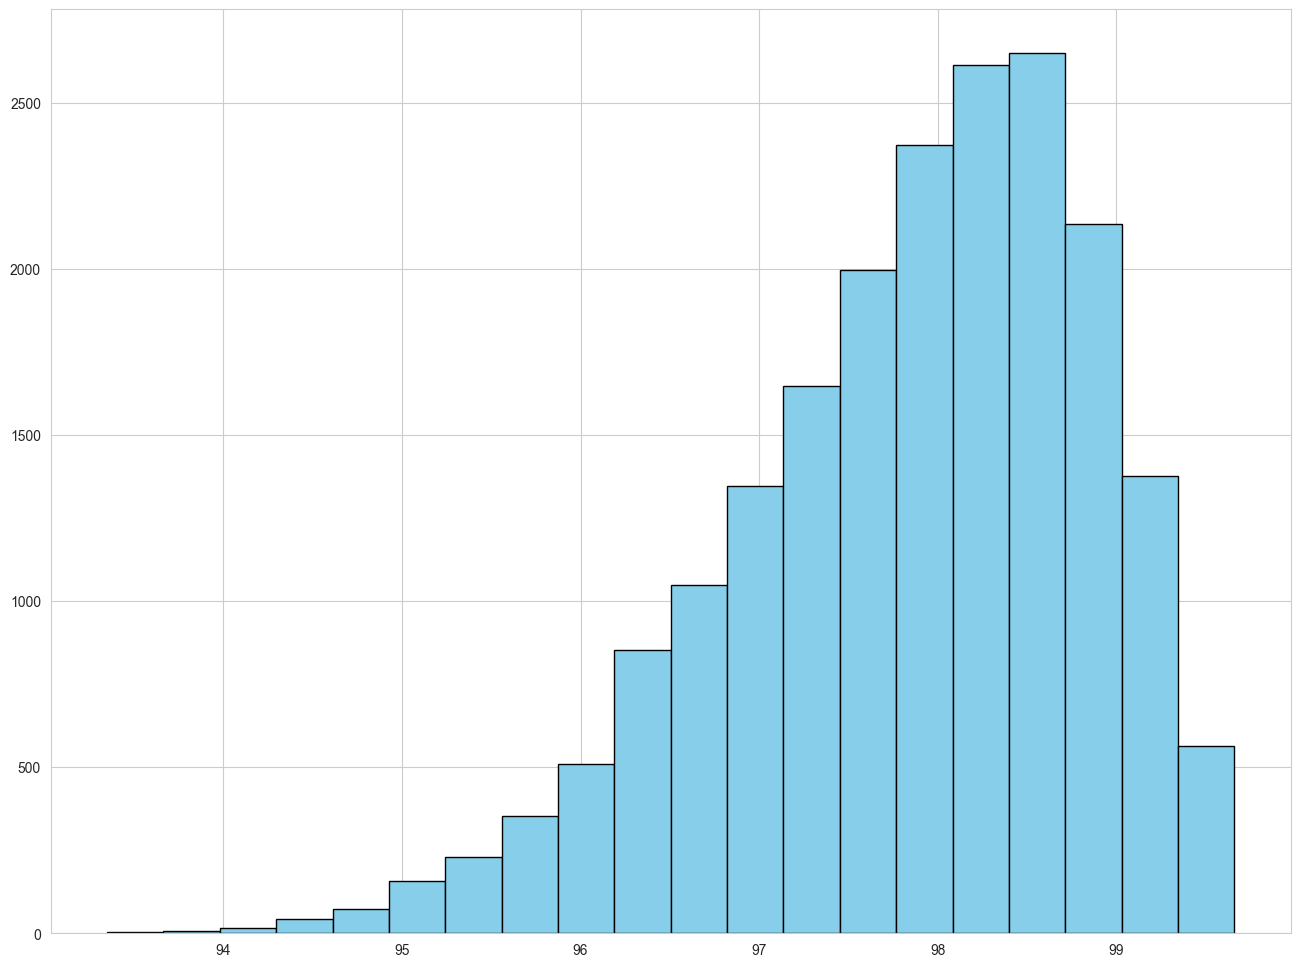

In [28]:
import matplotlib.pyplot as plt
plt.hist(df['Payment_Reliability_Score'], bins=20, color='skyblue', edgecolor='black')
plt.show()

In [29]:
import pandas as pd

# Read the existing dataset
df = pd.read_csv('processed_data_with_banks.csv')

# Define the CAELS scores mapping
caels_scores = {
    'Central Bank of India': (1.000, 'High Risk'),
    'UCO Bank': (0.960, 'High Risk'),
    'Punjab National Bank': (0.915, 'High Risk'),
    'Indian Overseas Bank': (0.904, 'High Risk'),
    'IDBI Bank Ltd.': (0.833, 'High Risk'),
    'Bank of India': (0.815, 'High Risk'),
    'Bank of Maharashtra': (0.812, 'High Risk'),
    'Canara Bank': (0.805, 'Medium Risk'),
    'Union Bank of India': (0.800, 'Medium Risk'),
    'Indian Bank': (0.698, 'Medium Risk'),
    'Bank of Baroda': (0.575, 'Medium Risk'),
    'Karnataka Bank': (0.536, 'Medium Risk'),
    'State Bank of India': (0.521, 'Medium Risk'),
    'Federal Bank Ltd.': (0.276, 'Medium Risk'),
    'IDFC FIRST Bank': (0.221, 'Low Risk'),
    'Yes Bank Ltd.': (0.155, 'Low Risk'),
    'IndusInd Bank Ltd.': (0.144, 'Low Risk'),
    'Axis Bank Ltd.': (0.131, 'Low Risk'),
    'ICICI Bank Ltd.': (0.117, 'Low Risk'),
    'HDFC Bank Ltd.': (0.013, 'Low Risk'),
    'Kotak Mahindra Bank': (0.000, 'Low Risk')
}

# Add CAELS Score and Risk Tier columns
df['Bank_CAELS_Score'] = df['UPI_Remitter_Bank'].map(lambda x: caels_scores.get(x, (None, None))[0])
df['Bank_Risk_Tier'] = df['UPI_Remitter_Bank'].map(lambda x: caels_scores.get(x, (None, None))[1])

# Check for any banks that didn't match
unmatched_banks = df[df['Bank_CAELS_Score'].isna()]['UPI_Remitter_Bank'].unique()
if len(unmatched_banks) > 0:
    print("Warning: The following banks were not found in the CAELS score mapping:")
    for bank in unmatched_banks:
        print(f"  - {bank}")

# Display summary statistics
print("\n=== CAELS Score Integration Summary ===")
print(f"Total records: {len(df)}")
print(f"Records with CAELS scores: {df['Bank_CAELS_Score'].notna().sum()}")
print(f"Records without CAELS scores: {df['Bank_CAELS_Score'].isna().sum()}")
print("\nRisk Tier Distribution:")
print(df['Bank_Risk_Tier'].value_counts())
print("\nCAELS Score Statistics:")
print(df['Bank_CAELS_Score'].describe())

# Save the updated dataset
df.to_csv('processed_data_with_banks_caels.csv', index=False)
print("\n✓ Updated dataset saved as 'processed_data_with_banks_caels.csv'")

# Display a sample of the data
print("\n=== Sample Data (first 5 rows) ===")
print(df[['UPI_Remitter_Bank', 'Bank_CAELS_Score', 'Bank_Risk_Tier']].head())


=== CAELS Score Integration Summary ===
Total records: 20000
Records with CAELS scores: 20000
Records without CAELS scores: 0

Risk Tier Distribution:
Bank_Risk_Tier
High Risk      7163
Medium Risk    6513
Low Risk       6324
Name: count, dtype: int64

CAELS Score Statistics:
count    20000.000000
mean         0.558336
std          0.346989
min          0.000000
25%          0.155000
50%          0.698000
75%          0.833000
max          1.000000
Name: Bank_CAELS_Score, dtype: float64

✓ Updated dataset saved as 'processed_data_with_banks_caels.csv'

=== Sample Data (first 5 rows) ===
       UPI_Remitter_Bank  Bank_CAELS_Score Bank_Risk_Tier
0   Punjab National Bank             0.915      High Risk
1         Axis Bank Ltd.             0.131       Low Risk
2            Indian Bank             0.698    Medium Risk
3    Union Bank of India             0.800    Medium Risk
4  Central Bank of India             1.000      High Risk


In [31]:
df = pd.read_csv('processed_data_with_banks_caels.csv')
print(df.columns)

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Annual_Income', 'Annual_Rent',
       'Annual_Loan_Repayment', 'Annual_Insurance', 'Annual_Groceries',
       'Annual_Transport', 'Annual_Eating_Out', 'Annual_Entertainment',
       'Annual_Utilities', 'Annual_Healthcare', 'Annual_Education',
       'Annual_Miscellaneous', 'Total_Annual_Expenses', 'Annual_Savings',
       'Actual_Savings_Rate', 'Missed_Rent', 'Missed_Utilities',
       'Missed_

In [32]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('processed_data_with_banks_caels.csv')

print("="*80)
print("CREATING FINAL DATASET")
print("="*80)

print(f"\nOriginal shape: {df.shape}")
print(f"Original columns: {len(df.columns)}")

# Define columns to keep
columns_to_keep = [
    # Demographics
    'Income',  # Monthly income
    'Age',
    'Dependents',
    'Occupation',
    'City_Tier',
    
    # Monthly Expenses (original features)
    'Rent',
    'Loan_Repayment',
    'Insurance',
    'Groceries',
    'Transport',
    'Eating_Out',
    'Entertainment',
    'Utilities',
    'Healthcare',
    'Education',
    'Miscellaneous',
    
    # Missed Payments (simulated features)
    'Missed_Rent',
    'Missed_Utilities',
    'Missed_Insurance',
    'Missed_Loan_Repayment',
    'Missed_Groceries',
    'Missed_Transport',
    'Missed_Eating_Out',
    'Missed_Entertainment',
    'Missed_Miscellaneous',
    'Missed_Healthcare',
    'Missed_Education',
    'Base_Miss_Rate_Pct',
    'Total_Missed_Payments',
    'Missed_Payment_Rate',
    
    # Banking Information
    'UPI_Remitter_Bank',
    'Bank_CAELS_Score',
    'Bank_Risk_Tier'
]

# Create final dataset with only the columns we want
final_df = df[columns_to_keep].copy()

# Calculate some useful derived features (monthly basis)
final_df['Total_Monthly_Expenses'] = (
    final_df['Rent'] + 
    final_df['Loan_Repayment'] + 
    final_df['Insurance'] + 
    final_df['Groceries'] + 
    final_df['Transport'] + 
    final_df['Eating_Out'] + 
    final_df['Entertainment'] + 
    final_df['Utilities'] + 
    final_df['Healthcare'] + 
    final_df['Education'] + 
    final_df['Miscellaneous']
)

final_df['Monthly_Disposable_Income'] = final_df['Income'] - final_df['Total_Monthly_Expenses']
final_df['Savings_Rate'] = (final_df['Monthly_Disposable_Income'] / final_df['Income'] * 100).round(2)
final_df['Debt_to_Income_Ratio'] = (final_df['Loan_Repayment'] / final_df['Income'] * 100).round(2)
final_df['Expense_to_Income_Ratio'] = (final_df['Total_Monthly_Expenses'] / final_df['Income'] * 100).round(2)

# Save the final dataset
output_file = 'data/final_dataset.csv'
final_df.to_csv(output_file, index=False)

print(f"\n✓ Final dataset created successfully!")
print(f"✓ Saved to: {output_file}")

print("\n" + "="*80)
print("FINAL DATASET SUMMARY")
print("="*80)

print(f"\nFinal shape: {final_df.shape}")
print(f"Total columns: {len(final_df.columns)}")
print(f"Total rows: {len(final_df)}")

print("\n📋 Column Categories:")
print("\n1. Demographics (5):")
demographics = ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier']
for col in demographics:
    print(f"   - {col}")

print("\n2. Monthly Expenses (11):")
expenses = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 
            'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']
for col in expenses:
    print(f"   - {col}")

print("\n3. Missed Payments (14):")
missed = [col for col in final_df.columns if 'Missed' in col or 'Base_Miss' in col]
for col in missed:
    print(f"   - {col}")

print("\n4. Banking Information (3):")
banking = ['UPI_Remitter_Bank', 'Bank_CAELS_Score', 'Bank_Risk_Tier']
for col in banking:
    print(f"   - {col}")

print("\n5. Calculated Metrics (5):")
calculated = ['Total_Monthly_Expenses', 'Monthly_Disposable_Income', 'Savings_Rate', 
              'Debt_to_Income_Ratio', 'Expense_to_Income_Ratio']
for col in calculated:
    print(f"   - {col}")

# Display sample data
print("\n" + "="*80)
print("SAMPLE DATA (First 5 rows)")
print("="*80)
print(final_df.head())

# Display statistical summary
print("\n" + "="*80)
print("KEY STATISTICS")
print("="*80)

print("\n📊 Income & Expenses (Monthly):")
print(f"Average Income: ₹{final_df['Income'].mean():,.2f}")
print(f"Average Total Expenses: ₹{final_df['Total_Monthly_Expenses'].mean():,.2f}")
print(f"Average Disposable Income: ₹{final_df['Monthly_Disposable_Income'].mean():,.2f}")
print(f"Average Savings Rate: {final_df['Savings_Rate'].mean():.2f}%")

print("\n💳 Missed Payments:")
print(f"Average Total Missed Payments: ₹{final_df['Total_Missed_Payments'].mean():,.2f}")
print(f"Average Missed Payment Rate: {final_df['Missed_Payment_Rate'].mean():.2f}%")
print(f"Average Base Miss Rate: {final_df['Base_Miss_Rate_Pct'].mean():.2f}%")

print("\n🏦 Banking Distribution:")
print(f"\nBy Risk Tier:")
print(final_df['Bank_Risk_Tier'].value_counts())
print(f"\nAverage CAELS Score: {final_df['Bank_CAELS_Score'].mean():.3f}")

print("\n👥 Demographics:")
print(f"\nBy Occupation:")
print(final_df['Occupation'].value_counts())
print(f"\nBy City Tier:")
print(final_df['City_Tier'].value_counts())

# Check for missing values
print("\n" + "="*80)
print("DATA QUALITY CHECK")
print("="*80)
print("\nMissing Values:")
missing = final_df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

print("\n" + "="*80)
print("COLUMNS REMOVED (Annual/Derived Features)")
print("="*80)

removed_columns = set(df.columns) - set(final_df.columns)
print(f"\nTotal columns removed: {len(removed_columns)}")
print("\nRemoved columns:")
for col in sorted(removed_columns):
    print(f"   - {col}")

print("\n" + "="*80)
print("✅ FINAL DATASET READY FOR PARTITIONING")
print("="*80)

CREATING FINAL DATASET

Original shape: (20000, 62)
Original columns: 62

✓ Final dataset created successfully!
✓ Saved to: data/final_dataset.csv

FINAL DATASET SUMMARY

Final shape: (20000, 38)
Total columns: 38
Total rows: 20000

📋 Column Categories:

1. Demographics (5):
   - Income
   - Age
   - Dependents
   - Occupation
   - City_Tier

2. Monthly Expenses (11):
   - Rent
   - Loan_Repayment
   - Insurance
   - Groceries
   - Transport
   - Eating_Out
   - Entertainment
   - Utilities
   - Healthcare
   - Education
   - Miscellaneous

3. Missed Payments (14):
   - Missed_Rent
   - Missed_Utilities
   - Missed_Insurance
   - Missed_Loan_Repayment
   - Missed_Groceries
   - Missed_Transport
   - Missed_Eating_Out
   - Missed_Entertainment
   - Missed_Miscellaneous
   - Missed_Healthcare
   - Missed_Education
   - Base_Miss_Rate_Pct
   - Total_Missed_Payments
   - Missed_Payment_Rate

4. Banking Information (3):
   - UPI_Remitter_Bank
   - Bank_CAELS_Score
   - Bank_Risk_Tier

5. Ca